In [1]:
# Data Dictionary
# Variable	Definition	                                  Key
# survival 	Survival 	                                  0 = No, 1 = Yes
# pclass 	Ticket class 	                              1 = 1st, 2 = 2nd, 3 = 3rd
# sex 	    Sex 	
# Age 	    Age in years 	
# sibsp 	# of siblings / spouses aboard the Titanic 	
# parch 	# of parents / children aboard the Titanic 	
# ticket 	Ticket number 	
# fare 	    Passenger fare 	
# cabin 	Cabin number 	
# embarked 	Port of Embarkation                            C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
import os, sys
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [3]:
# Read in datasets
train=pd.read_csv('../data/titanic_train.csv')
test=pd.read_csv('../data/titanic_test.csv')

In [4]:
train[train['Ticket'].duplicated(keep=False)].sort_values(by='Ticket').head(10)
# more likely to die if you were married and male and over 18? 
# less likely to die if you under 18?
# if under 18, more or less likely do die if you were male or female?
# any significant for children who traveled only with a nanny (i.e. Parch is 0)
# any significance of cabin number? some have 2, somehave 3 or 4... does this correlate to number of spouses/children
# any significant if the passengers stayed in the same cabin or not (if they died did they both die, or did one survive?)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C


In [8]:
train.isnull().sum() # 177 null ages, 687 null cabins, 2 null embarked

# to impute age approaches:
# split into segments based on gender factor and age
# apply KNN imputer to each subgroup and rejoin to the original data set

# how to handle imbalanced class of men vs women or children vs adult? 
# create a DNN to predict just to get in the flow of running tensorflow models

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
# to blitz through this and get aresult:
train['Age']=train['Age'].fillna(train['Age'].median())

In [40]:
train=train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])

In [43]:
X_train=train[[col for col in train.columns if col != 'Survived']]
y_train=train['Survived']

In [50]:
X_train['Sex']=pd.get_dummies(X_train['Sex'], drop_first=True)

/tmp/ipykernel_24491/1641712369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex']=pd.get_dummies(X_train['Sex'], drop_first=True)


In [51]:
rfc=RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
X_test=test[[col for col in test.columns if col in X_train.columns]]
X_test['Sex']=pd.get_dummies(X_test['Sex'], drop_first=True)


/tmp/ipykernel_24491/1424782486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex']=pd.get_dummies(X_test['Sex'], drop_first=True)


In [59]:
X_test['Age']=X_test['Age'].fillna(X_test['Age'].median())
X_test['Fare']=X_test['Fare'].fillna(X_test['Fare'].median())

/tmp/ipykernel_24491/28171487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age']=X_test['Age'].fillna(X_test['Age'].median())
/tmp/ipykernel_24491/28171487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fare']=X_test['Fare'].fillna(X_test['Fare'].median())


In [61]:
y_pred=rfc.predict(X_test)

In [74]:
out=pd.concat([test['PassengerId'],pd.Series(y_pred)], axis=1)

In [75]:
out.columns=['PassengerID', 'Survived']

In [76]:
out.to_csv('rfc_test.csv', index=False) # 73    

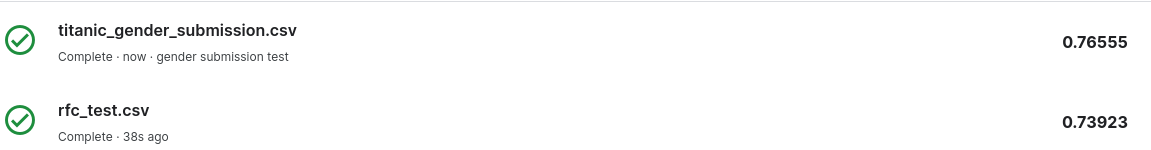